<a href="https://colab.research.google.com/github/Vinther07/Vinther07/blob/main/When_can_you_retire_user_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Description: FIRE retirement strategy Python project

In [34]:
# Importing needed libraries use: pip install --upgrade numpy (to update)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Creating list 
Year = []
Yearly_Income = []
Yearly_Expenses = []
Yearly_Investments =[]
Annual_Returns = []

In [36]:
# Your yearly constant income
income = int(input("What is your yearly income? "))

# What percentage of your income do you need to cover your expences?
expenseratio = float(input("What is your expected expence ratio? (eg. 0.5 for half income after tax to pay for expenses) "))
expenses = income * expenseratio
print("Your yearly expenses are set to: " + str(expenses))
Monthly_expenses = expenses/12
print(("Your montly expenses are set to: " + str(Monthly_expenses)))

# What is your expected annual interest rate? Could use: https://www.afkastforventninger.dk/ as a baseline
interest_rate = float(input("What interest rate do you expect to get? (0.08 for 8%) "))

# Annual investment
investment = income - expenses

# Calculate your annual return based on inputs from ealier
annual_return = float((income - expenses) * interest_rate)

# Printing expected non compounded investment return before taxes
print("Your yearly return on investment before tax is: " + str(annual_return))

#Getting current year 
year = 2021

What is your yearly income? 130000
What is your expected expence ratio? (eg. 0.5 for half income after tax to pay for expenses) 0.7
Your yearly expenses are set to: 91000.0
Your montly expenses are set to: 7583.333333333333
What interest rate do you expect to get? (0.08 for 8%) 0.2
Your yearly return on investment before tax is: 7800.0


In [37]:
# Append the first values to the lists
Year.append(year)
Yearly_Income.append(income)
Yearly_Expenses.append(expenses)
Yearly_Investments.append(investment)
Annual_Returns.append(annual_return)

In [38]:
# Loop for "n" years
invested_years = input("How many years do you invest like this? ")
for i in range (0, int(invested_years)-1):
  # Update the investment to be the previous investment plus the previous annual return plus half of your income.
  investment = investment + annual_return + income/2
  # Update the annual return to be the current investment times the interest rate
  annual_return = investment * interest_rate
  # Append new data to the list
  Year.append(year+i+1)
  Yearly_Income.append(income)
  Yearly_Expenses.append(expenses)
  Yearly_Investments.append(investment)
  Annual_Returns.append(annual_return)

How many years do you invest like this? 7


In [39]:
# Create a dataframe
df = pd.DataFrame()
df['Year'] = Year
df['Yearly_Income'] = Yearly_Income
df['Yearly_Expenses'] = Yearly_Expenses
df['Yearly_Investments'] = Yearly_Investments
df['Annual_Returns'] = Annual_Returns

In [40]:
# Show the data
df

,Year,Yearly_Income,Yearly_Expenses,Yearly_Investments,Annual_Returns
0,2021,130000,91000.0,39000.000,7800.0000
1,2022,130000,91000.0,111800.000,22360.0000
2,2023,130000,91000.0,199160.000,39832.0000
3,2024,130000,91000.0,303992.000,60798.4000
4,2025,130000,91000.0,429790.400,85958.0800
5,2026,130000,91000.0,580748.480,116149.6960
6,2027,130000,91000.0,761898.176,152379.6352


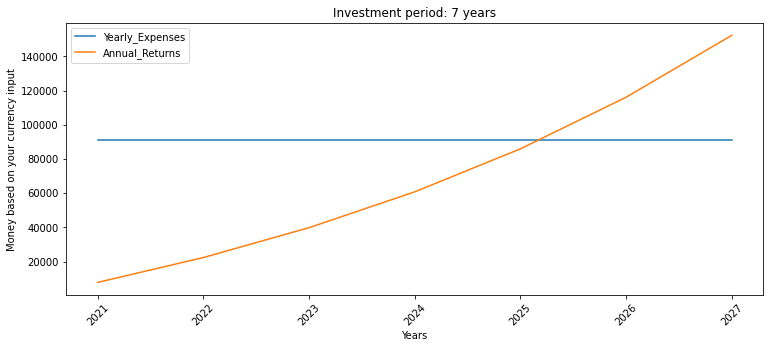

In [41]:
# Vissualize the data
plt.figure(figsize=(12.5, 5))
plt.plot(df['Year'], df['Yearly_Expenses'], label = 'Yearly_Expenses')
plt.plot(df['Year'], df['Annual_Returns'], label = 'Annual_Returns')
plt.xticks(rotation = 45)
plt.title('Investment period: '+ str(invested_years)+ ' years')
plt.xlabel('Years')
plt.ylabel('Money based on your currency input')
plt.xticks(df['Year'])
plt.legend()
plt.show()

In [42]:
# Show the year / row where you can live off your returns
df[df.Yearly_Expenses <= df.Annual_Returns].head(1)

,Year,Yearly_Income,Yearly_Expenses,Yearly_Investments,Annual_Returns
5,2026,130000,91000.0,580748.48,116149.696
